# Active Layer Evaluation

This script contains the development of the figures to evaluate the performance of the active layer compared with the original IFC model.

In [51]:
%matplotlib inline 
import numpy as np 
import pylab as pl 
import pandas as pd 
from matplotlib import gridspec
from ifis_tools import series_tools as ser
from aclayer import core
import warnings
warnings.filterwarnings('ignore')

In [360]:
colors = {'ifc-hlm': '#d6604d',
         'a-hlm': '#92c5de',
         'd-hlm': '#225ea8'}

# Histograms of performance metrics

In [58]:
Ymet = pd.read_msgpack('data/results/Yearly_Metrics_sce.msg')
Ymet.head()

,product,kge,nse,vol,pbias,Hits,PeakDif,Qpeak,corr,best_corr,moves,meanRatio,stdRatio,Misses,link
2008,usgs,1.0,1.0,233017.174133,-0.0,1.0,0.0,760.3060,1.0,1.0,0,1.0,1.0,0.0,279554
2009,usgs,1.0,1.0,161455.760904,-0.0,1.0,0.0,338.3860,1.0,1.0,0,1.0,1.0,0.0,279554
2010,usgs,1.0,1.0,342954.078335,-0.0,1.0,0.0,551.4700,1.0,1.0,0,1.0,1.0,0.0,279554
2011,usgs,1.0,1.0,123070.611515,-0.0,1.0,0.0,181.5815,1.0,1.0,0,1.0,1.0,0.0,279554
2012,usgs,1.0,1.0,78513.364236,-0.0,1.0,0.0,308.6530,1.0,1.0,0,1.0,1.0,0.0,279554


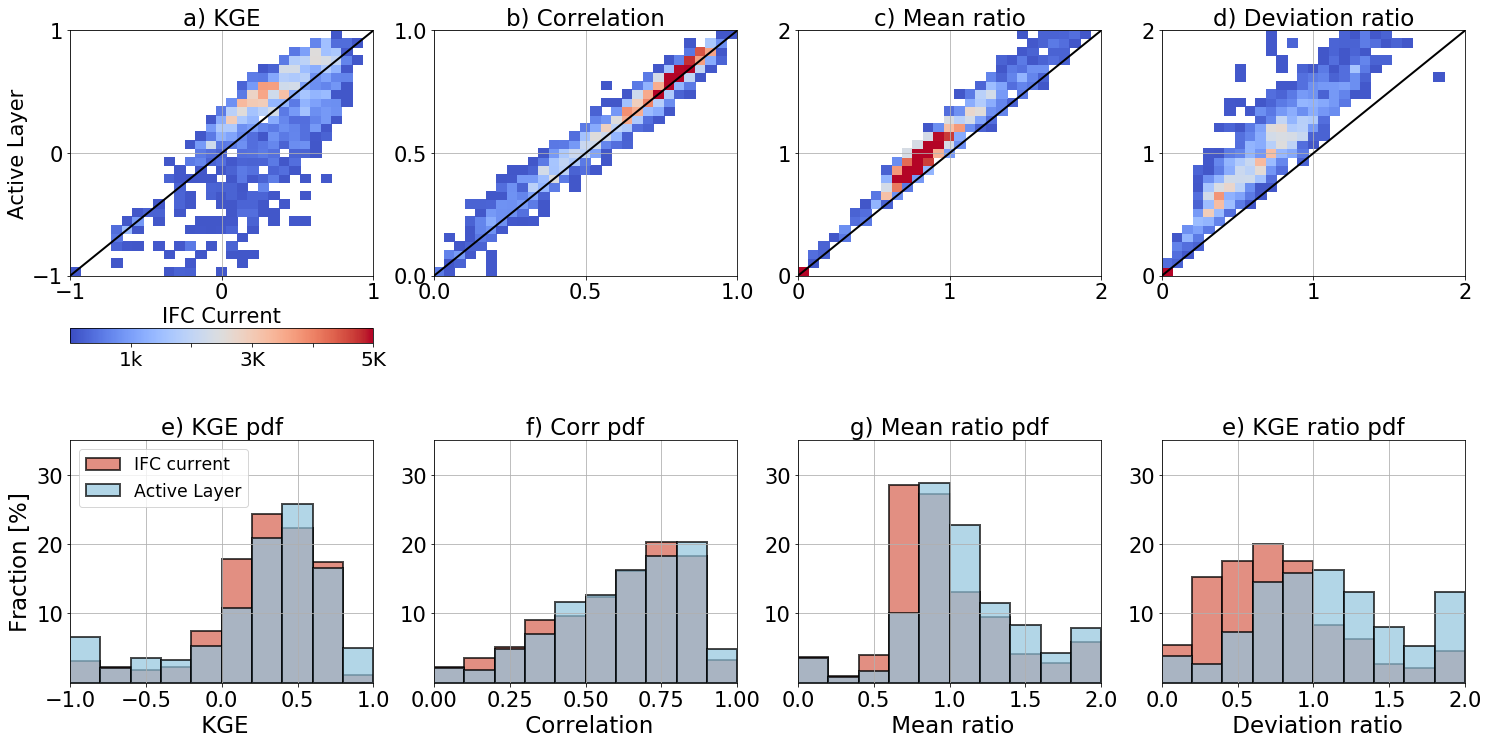

In [267]:
fig = pl.figure(figsize=(25,12))
gs = gridspec.GridSpec(2,4, height_ratios = [1.3,0.9])

names = ['a) KGE','b) Correlation','c) Mean ratio', 'd) Deviation ratio']
names2 = ['e) KGE pdf','f) Corr pdf','g) Mean ratio pdf','e) KGE ratio pdf']
Metrics2eval = ['kge','corr','meanRatio','stdRatio']
ranges = [[-1,1],[0,1],[0,2],[0,2]]
bins = [np.linspace(-1,1,30),np.linspace(0,1,30),np.linspace(0,2,30),np.linspace(0,2,30)]
bins2 = [np.arange(-1,1.2,0.2), np.arange(0,1.4,0.1), np.arange(0,2.2,0.2), np.arange(0,2.2,0.2)]
limits = [[-1, None], [None, None],[None, 2], [None,2]]
for i,met,ran,name,n2,bins_1, bins_2, limi in zip(range(4), Metrics2eval, ranges, names, names2,bins, bins2, limits):
    
    #Draw the 2d histogram
    ax = fig.add_subplot(gs[i])    
    ax,cmap = plot_hist2d(ax, Ymet, 'ifc-hlm','a-hlm', bins = bins_1, metric = met,
                     x1 = ran[0], x2 = ran[-1],
                     y=np.arange(2008,2019), vmin = 1, vmax = 5000, cmin = 1, cmap = True)
    ax.set_title(name, size = 23)
    if i > 0:
        ax.set_ylabel('')
        ax.set_xlabel('')
        cmap.remove()
    else:
        ax.set_ylabel('Active Layer')
        ax.set_xlabel('IFC Current')
        #cmap.ax.set_xticks([0, 2500, 5000])
        cmap.ax.set_xticklabels(['1k','','3K','','5K'])
        
    ax.set_yticks(ax.get_xticks()[::2])
    ax.set_xticks(ax.get_yticks())
    ax.grid()
    
    
    #Draw the summary histogram
    ax = fig.add_subplot(gs[i+4])
    a = Ymet[[met,'link']][B['product'] == 'ifc-hlm']    
    h,b = get_histogram(a[met], bins_2, inf=limi[0], sup = limi[-1])
    w = bins_2[1] - bins_2[0]
    ax.bar(b[:-1], h*100, w, color = colors['ifc-hlm'], alpha = 0.7, edgecolor = 'k', lw = 2, 
           align = 'edge', label = 'IFC current')
    ax.set_xlim(ran[0],ran[1])
    ax.set_ylim(0,0.5)
    ax.tick_params(labelsize = 21)
    a = Ymet[[met,'link']][B['product'] == 'a-hlm']
    h,b = get_histogram(a[met], bins_2, inf=limi[0], sup = limi[-1])
    ax.bar(b[:-1], h*100, w, color = colors['a-hlm'], alpha =0.7, edgecolor = 'k', lw = 2, align = 'edge',
          label = 'Active Layer')
    ax.set_xlim(ran[0],ran[1])
    ax.set_ylim(0,35)
    ax.tick_params(labelsize = 21)
    ax.grid()
    ax.set_xlabel(name[2:], size = '23')
    ax.set_yticks([10,20,30])
    if i == 0:
        ax.set_ylabel('Fraction [$\%$]', size = 23)
        ax.legend(loc = 0, fontsize = 'xx-large')
    ax.set_title(n2, size = 23)
        
pl.savefig('figures/kge_active_vs_operational.png', bbox_inches = 'tight')

**Figure**: Effect of the Active layer equation formulation on the KGE performance of the model. Column a) KGE index, columns b to d correspond to the pearson correlation, mean ratio, and deviation ratio, the three components of the KGE index. 

Highlight of this figure:
- The active layer model produces an overall increase of the KGE.
- It also significantly increases the rate of stations that obtain a KGE near 1.0.
- However, there is also an increase of cases with KGE values equal or below -1.0.
- Regarding the components, the correlation has almost no changes.
- Moreover, the Active Layer model increases the rate of cases with mean and deviation ratio near 1.0.
- compared with the current IFC model, the active layer diminish greatly the mean ratios with rates below 1.0.

**Conclusion**: The active layer model does increase the model performance, it seems that this increase is obtained through a better representation of the Mean and deviation ratios. 

In [253]:
Ymet.head()

,product,kge,nse,vol,pbias,Hits,PeakDif,Qpeak,corr,best_corr,moves,meanRatio,stdRatio,Misses,link
2008,usgs,1.0,1.0,233017.174133,-0.0,1.0,0.0,760.3060,1.0,1.0,0,1.0,1.0,0.0,279554
2009,usgs,1.0,1.0,161455.760904,-0.0,1.0,0.0,338.3860,1.0,1.0,0,1.0,1.0,0.0,279554
2010,usgs,1.0,1.0,342954.078335,-0.0,1.0,0.0,551.4700,1.0,1.0,0,1.0,1.0,0.0,279554
2011,usgs,1.0,1.0,123070.611515,-0.0,1.0,0.0,181.5815,1.0,1.0,0,1.0,1.0,0.0,279554
2012,usgs,1.0,1.0,78513.364236,-0.0,1.0,0.0,308.6530,1.0,1.0,0,1.0,1.0,0.0,279554


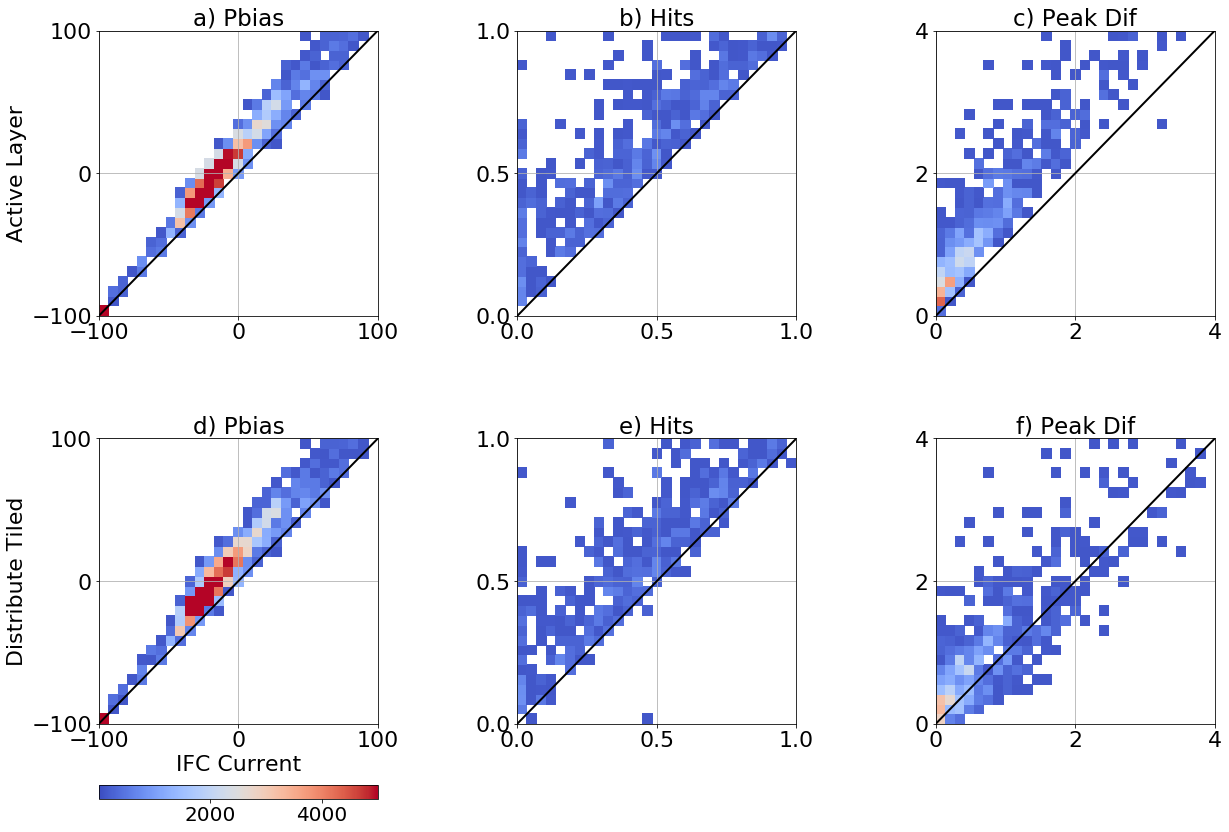

In [347]:
fig = pl.figure(figsize=(20,15))
gs = gridspec.GridSpec(2,3,)# height_ratios = [1.3,0.9])
gs.update(wspace=0.5, hspace=0.001)

names = ['a) Pbias','b) Hits','c) Peak Dif',
        'd) Pbias','e) Hits','f) Peak Dif']
Metrics2eval = ['pbias','Hits','PeakDif']
ranges = [[-100,100],[0,1],[0,4]]
bins = [np.linspace(-100,100,30),np.linspace(0,1,30),np.linspace(0,4,30)]

for i,met,ran,name,n2,bins_1, bins_2, limi in zip(range(4), Metrics2eval, ranges, names, names2,bins, bins2, limits):
    
    #Draw the 2d histogram
    ax = fig.add_subplot(gs[i])    
    ax,cmap = plot_hist2d(ax, Ymet, 'ifc-hlm','a-hlm', bins = bins_1, metric = met,
                     x1 = ran[0], x2 = ran[-1],
                     y=np.arange(2008,2019), vmin = 1, vmax = 5000, cmin = 1, cmap = True)
    ax.set_yticks(ax.get_xticks()[::2])
    ax.set_xticks(ax.get_yticks())
    ax.grid()
    ax.tick_params(labelsize = 22)
    ax.set_title(name, size = 23)
    
    cmap.remove()
    ax2 = fig.add_subplot(gs[i+3])    
    ax2,cmap2 = plot_hist2d(ax2, Ymet, 'ifc-hlm','d-hlm', bins = bins_1, metric = met,
                     x1 = ran[0], x2 = ran[-1],
                     y=np.arange(2008,2019), vmin = 1, vmax = 5000, cmin = 1, cmap = True)
    ax2.grid()    
    ax2.tick_params(labelsize = 22)
    ax2.set_yticks(ax2.get_xticks()[::2])
    ax2.set_xticks(ax2.get_yticks())
    ax2.set_title(names[i+3], size = 23)
    
    if i > 0:
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax2.set_ylabel('')
        ax2.set_xlabel('')        
        cmap2.remove()
    else:
        ax.set_ylabel('Active Layer', size = 22)
        ax2.set_ylabel('Distribute Tiled', size = 22)
        ax2.set_xlabel('IFC Current', size = 22)
        ax.set_xlabel('')
        cmap2.ax.set_xticks([0,1000,2000,4000])
        #cmap2.ax.set_xticklabels(['1k','','3K','','5K'])

pl.savefig('figures/pbias_hist_peakdif.png',bbox_inches = 'tight')

**Figure**: Pbias, Hits, and Peak difference index ratios for the Active Layer and Tile drainage setups. Frames a and d correspond to the Pbias, b and e to the Hits ratio, and c and f to the Peak difference.

According to the results, the Tile drainage model does not produce high differences on the performance. However, the Tile setup increase somewhat the Pbias index. 

# Performance evolution with the area

In [370]:
areas = pd.read_csv('data/link_areas.csv', index_col=0)

In [371]:
def getPerc(t, p):    
    pos = np.where(np.isfinite(t))[0]
    forBox = []
    inter = []
    for ta in [[0,10],[10,100],[100,1000],[1000,10000],[10000,50000]]:
        p1 = np.where((are.values[pos]>ta[0]) & (are.values[pos]<ta[1]))[0]
        forBox.append(np.percentile(t[pos][p1], p))
    return forBox

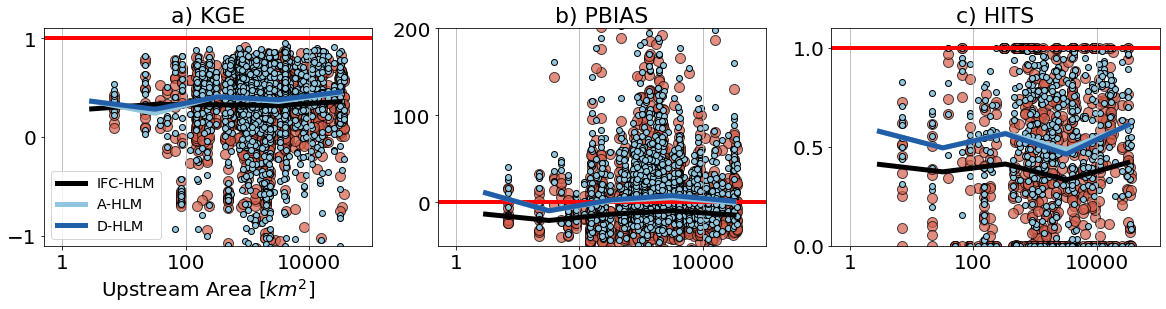

In [373]:
fig= pl.figure(figsize=(20,4))

B = Ymet.copy()
ylims = [[-1.1,1.1],[-50,200],[0,1.1]]
obj = [1.0, 0.0, 1.0]
#clrs = ['g', colors[-1]]
let=['a)','b)','c)']
yticks = [[-1, 0.0, 1],
         [0, 100, 200],
         [0.0, 0.5, 1.0]]

for c, met in enumerate(['kge','pbias','Hits']):
    a = B[[met,'link']][B['product'] == 'ifc-hlm']
    b = B[[met,'link']][B['product'] == 'a-hlm']
    g = B[[met,'link']][B['product'] == 't-hlm']
    h = B[[met,'link']][B['product'] == 'd-hlm']
    idx = areas.index.intersection(a.link.astype(int))
    are = areas['area'][idx]
    
    ax = fig.add_subplot(1,3,c+1)
    pl.scatter(areas['area'][idx], a[met], c = colors['ifc-hlm'], edgecolors='k', s = 100, alpha = 0.7)
    pl.scatter(areas['area'][idx], b[met], c = colors['a-hlm'], edgecolors='k', alpha = 1.0)   
    
    box_pos = np.array([3.0, 32, 330, 3200, 32000])
    P = getPerc(a[met].values, 50)    
    ax.plot(box_pos, P, 'k', lw = 5, label = 'IFC-HLM')
    P = getPerc(b[met].values, 50)    
    ax.plot(box_pos, P, colors['a-hlm'], lw = 5, label = 'A-HLM')
    P = getPerc(h[met].values, 50)    
    ax.plot(box_pos, P, colors['d-hlm'], lw = 5, label = 'D-HLM')
    #P = getPerc(h[met].values, 50)    
    #ax.plot(box_pos, P, colors[1], lw = 5, label = 'D-HLM')
    
    
    ax.set_xscale('log')
    ax.hlines(obj[c], 0.5, 105000, lw = 4, colors='r')
    ax.set_ylim(ylims[c][0],ylims[c][-1])
    ax.set_xlim(0.5, 105000)
    ax.set_xticks([1,100,10000])
    ax.set_xticklabels([1, 100, 10000])
    ax.tick_params(labelsize = 20)
    ax.set_yticks(yticks[c])
    ax.grid(axis = 'x')
    ax.set_title(let[c] + ' ' +met.upper(), size = 22)
    if  c==0:
        ax.set_xlabel('Upstream Area [$km^2$]', size = 20)
        ax.legend(loc = 0, fontsize= 'x-large')
pl.subplots_adjust(wspace=0.2, hspace=0.2)
pl.savefig('figures/kge_pbias_hist_vs_area.png', bbox_inches = 'tight')

# Qpeak Differences

In [190]:
Emet = pd.read_msgpack('data/results/Events_Metrics_sce.msg')

In [191]:
Emet.head()

,product,qpeak,qmean,qmax_anual,qpeakDiff,tpeakDiff,kge,nse,pbias,up_area,link
2012-06-01 07:00:00,usgs,94.1640,34.23412,119.55288,0.0,0.0,1.0,1.0,0.0,4323.5576,555741
2012-06-05 20:00:00,usgs,94.6596,34.23412,119.55288,0.0,0.0,1.0,1.0,0.0,4323.5576,555741
2013-06-24 21:00:00,usgs,99.4740,34.23412,119.55288,0.0,0.0,1.0,1.0,0.0,4323.5576,555741
2014-06-21 01:00:00,usgs,204.3288,34.23412,119.55288,0.0,0.0,1.0,1.0,0.0,4323.5576,555741
2014-06-27 00:00:00,usgs,176.4336,34.23412,119.55288,0.0,0.0,1.0,1.0,0.0,4323.5576,555741


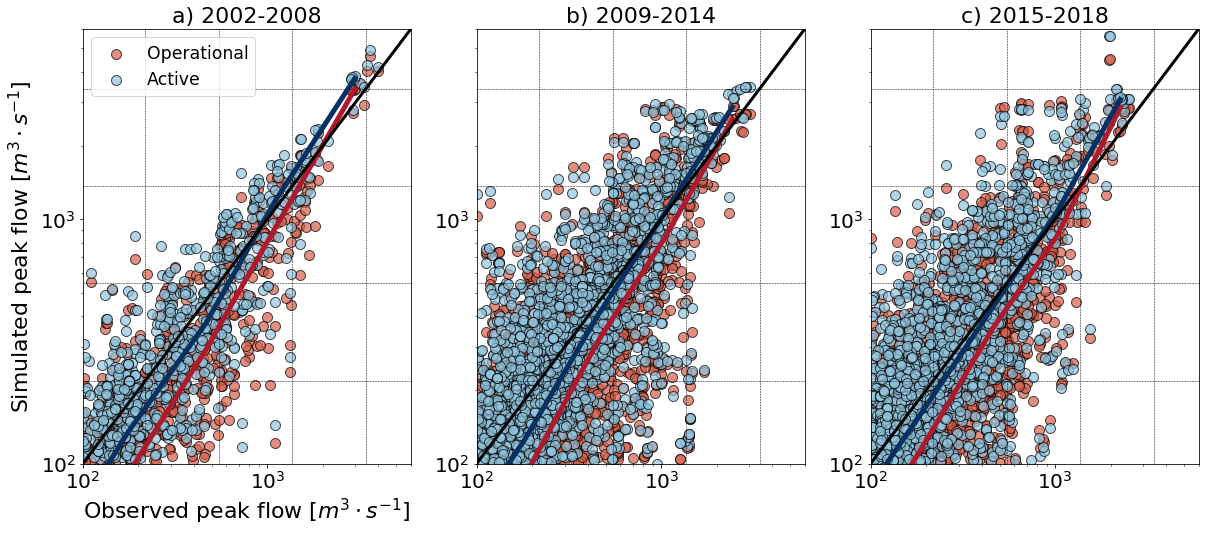

In [346]:
bins = []
val = 50
bins.append(val)
for i in range(5):
    val *= 2.5
    bins.append(val)
bins = np.array(bins)
bins2 = (bins[:-1]+bins[1:])/2.

fig = pl.figure(figsize=(20,8))
cont = 1
pre = ''
name = ['a)','b)','c)','d)','e)','f)','g)','h)','i)']
for y1,y2 in zip([2002,2009,2015],[2008,2014,2018]):
    y1t = str(y1)
    y2t = str(y2)
    
    for model,co in zip(['d-hlm'],range(2)):
        ax = fig.add_subplot(1,3,cont)

        a,b,idx = core.get_intersec('qpeak', 'usgs','ifc-hlm',Emet, y1t,y2t)
        po,ps = core.percentiles(a['qpeak'].loc[idx], b['qpeak'].loc[idx], bins = bins)
        po2,ps2 = core.percentiles(a['qpeak'].loc[idx], a['qpeak'].loc[idx], bins = bins)
        c1 = a['qpeak'].loc[idx].values
        c2 = b['qpeak'].loc[idx].values
        p = np.where((c1>100) & (c2 > 100))[0]
        ax.scatter(c1[p],c2[p], c = '#d6604d',s = 100, edgecolors='k', alpha = 0.7, label = pre+'Operational')
        ax.plot(ps2,ps, '#b2182b',lw = 5)

        a,b,idx = core.get_intersec('qpeak', 'usgs',model,Me,y1t,y2t)
        po,ps = core.percentiles(a['qpeak'].loc[idx], b['qpeak'].loc[idx], bins = bins)
        c1 = a['qpeak'].loc[idx].values
        c2 = b['qpeak'].loc[idx].values
        p = np.where((c1>100) & (c2 > 100))[0]
        ax.scatter(c1[p],c2[p], c = '#92c5de',s = 100, edgecolors='k', alpha = 0.7, label = pre+'Active')
        ax.plot(ps2,ps, '#053061',lw = 5)

        pl.loglog([5,6000],[5,6000], 'k', lw = 3)
        ax.set_title(name[cont-1]+' '+y1t+'-'+y2t, size = 22)
        ax.set_xlim(100,6000)
        ax.set_ylim(100,6000)
        ax.vlines(bins2, 100,6000, lw = 0.5, ls = '--')
        ax.hlines(bins2, 100,6000, lw = 0.5, ls = '--')
        ax.tick_params(labelsize = 20)
        if cont == 1:
            ax.legend(loc = 0, fontsize = 'xx-large')

        if cont == 1:  
            ax.set_ylabel('Simulated peak flow [$m^3 \cdot s^{-1}$]', size = 22)
            ax.set_xlabel('Observed peak flow [$m^3 \cdot s^{-1}$]', size = 22)
        if cont == 2:
            pre = '_'
        cont+=1
pl.savefig('figures/Peak_active_vs_operational.png', bbox_inches = 'tight')

# Some events as an example 

In [416]:
flood = pd.read_csv('data/flood_levels.csv', index_col=0)
names = pd.read_csv('data/stations_names.csv', index_col=0)
usgs = pd.read_csv('data/usgs_codes.csv', index_col=0)

In [459]:
def plot_event(ax, link, name, legend = True, path = None, 
               f1 = '2016-08', f2 = '2016-11', timeFreq = '30d',ytext = None, text = None):
    qo = pd.read_msgpack('/Users/nicolas/BaseData/USGS_hourlyV2/'+str(link)+'.msg')
    #q2= pd.read_msgpack('/Users/nicolas/BaseData/HLM254v2/'+str(link)+'__.msg')
    q2 = pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/254/st4/'+str(link)+'__.msg')
    
    try:
        fa = flood.loc[int(link)]['qaction']
        ta = 'action'
        ff = flood.loc[int(link)]['qflood']
        tf = 'flood'
    except:
        fa = np.percentile(qo[qo>0], 96)
        ta = 'action'
        ff = np.percentile(qo[qo>0], 99)
        tf = 'flood'
    
    pl.scatter(qo[f1:f2].index.to_pydatetime(), qo[f1:f2].values, c = 'k', s = 100, label = 'Observed')    
    
    q1= pd.read_msgpack('/Users/nicolas/Tiles/State/outputs/302/st4/'+str(link)+'__.msg')  
    pl.plot(q1['Q'][f1:f2].index, q1['Q'][f1:f2].values, c = colors['a-hlm'], lw = 4, label = 'Partially Drained')

    pl.plot(q2['Q'][f1:f2].index, q2['Q'][f1:f2].values, c = colors['ifc-hlm'], lw = 4, label = 'IFC Current')
    pl.hlines(fa, f1,f2, colors = 'k',ls = '--', lw = 3)
    pl.text(f1, fa+5, ta, size = 20)
    pl.hlines(ff, f1,f2, colors = 'r',ls = '--', lw = 3)
    pl.text(f1, ff+10, tf, size = 20, color = 'r')
    ax.tick_params(labelsize = 22)
    area = db.SQL_Get_linkArea(link)
    if legend:
        ax.legend(loc = 'upper right', fontsize = 'xx-large')
    ax.set_ylabel('Streamflow [$m^3 \cdot s^{-1}$]', size = 24)
    title = '%s (%d $km^2$)' % (name, area)
    #title = '%s' % (name)
    ax.set_title(title, size = 24)
    ax.set_xlim(f1,f2)
    if ytext is not None:
        ax.text(0.0,ytext, text, size = 26)
    ax.set_xticks(pd.date_range(f1, f2,freq=timeFreq).to_pydatetime())
    ax.set_xticklabels(pd.date_range(f1, f2,freq=timeFreq).strftime('%Y-%m-%d'))
    #ax.ticklabel_format(axis = 'y', style='sci', scilimits = (1,3))
    if path is not None:
        pl.savefig(path, bbox_inches = 'tight')
    return ax

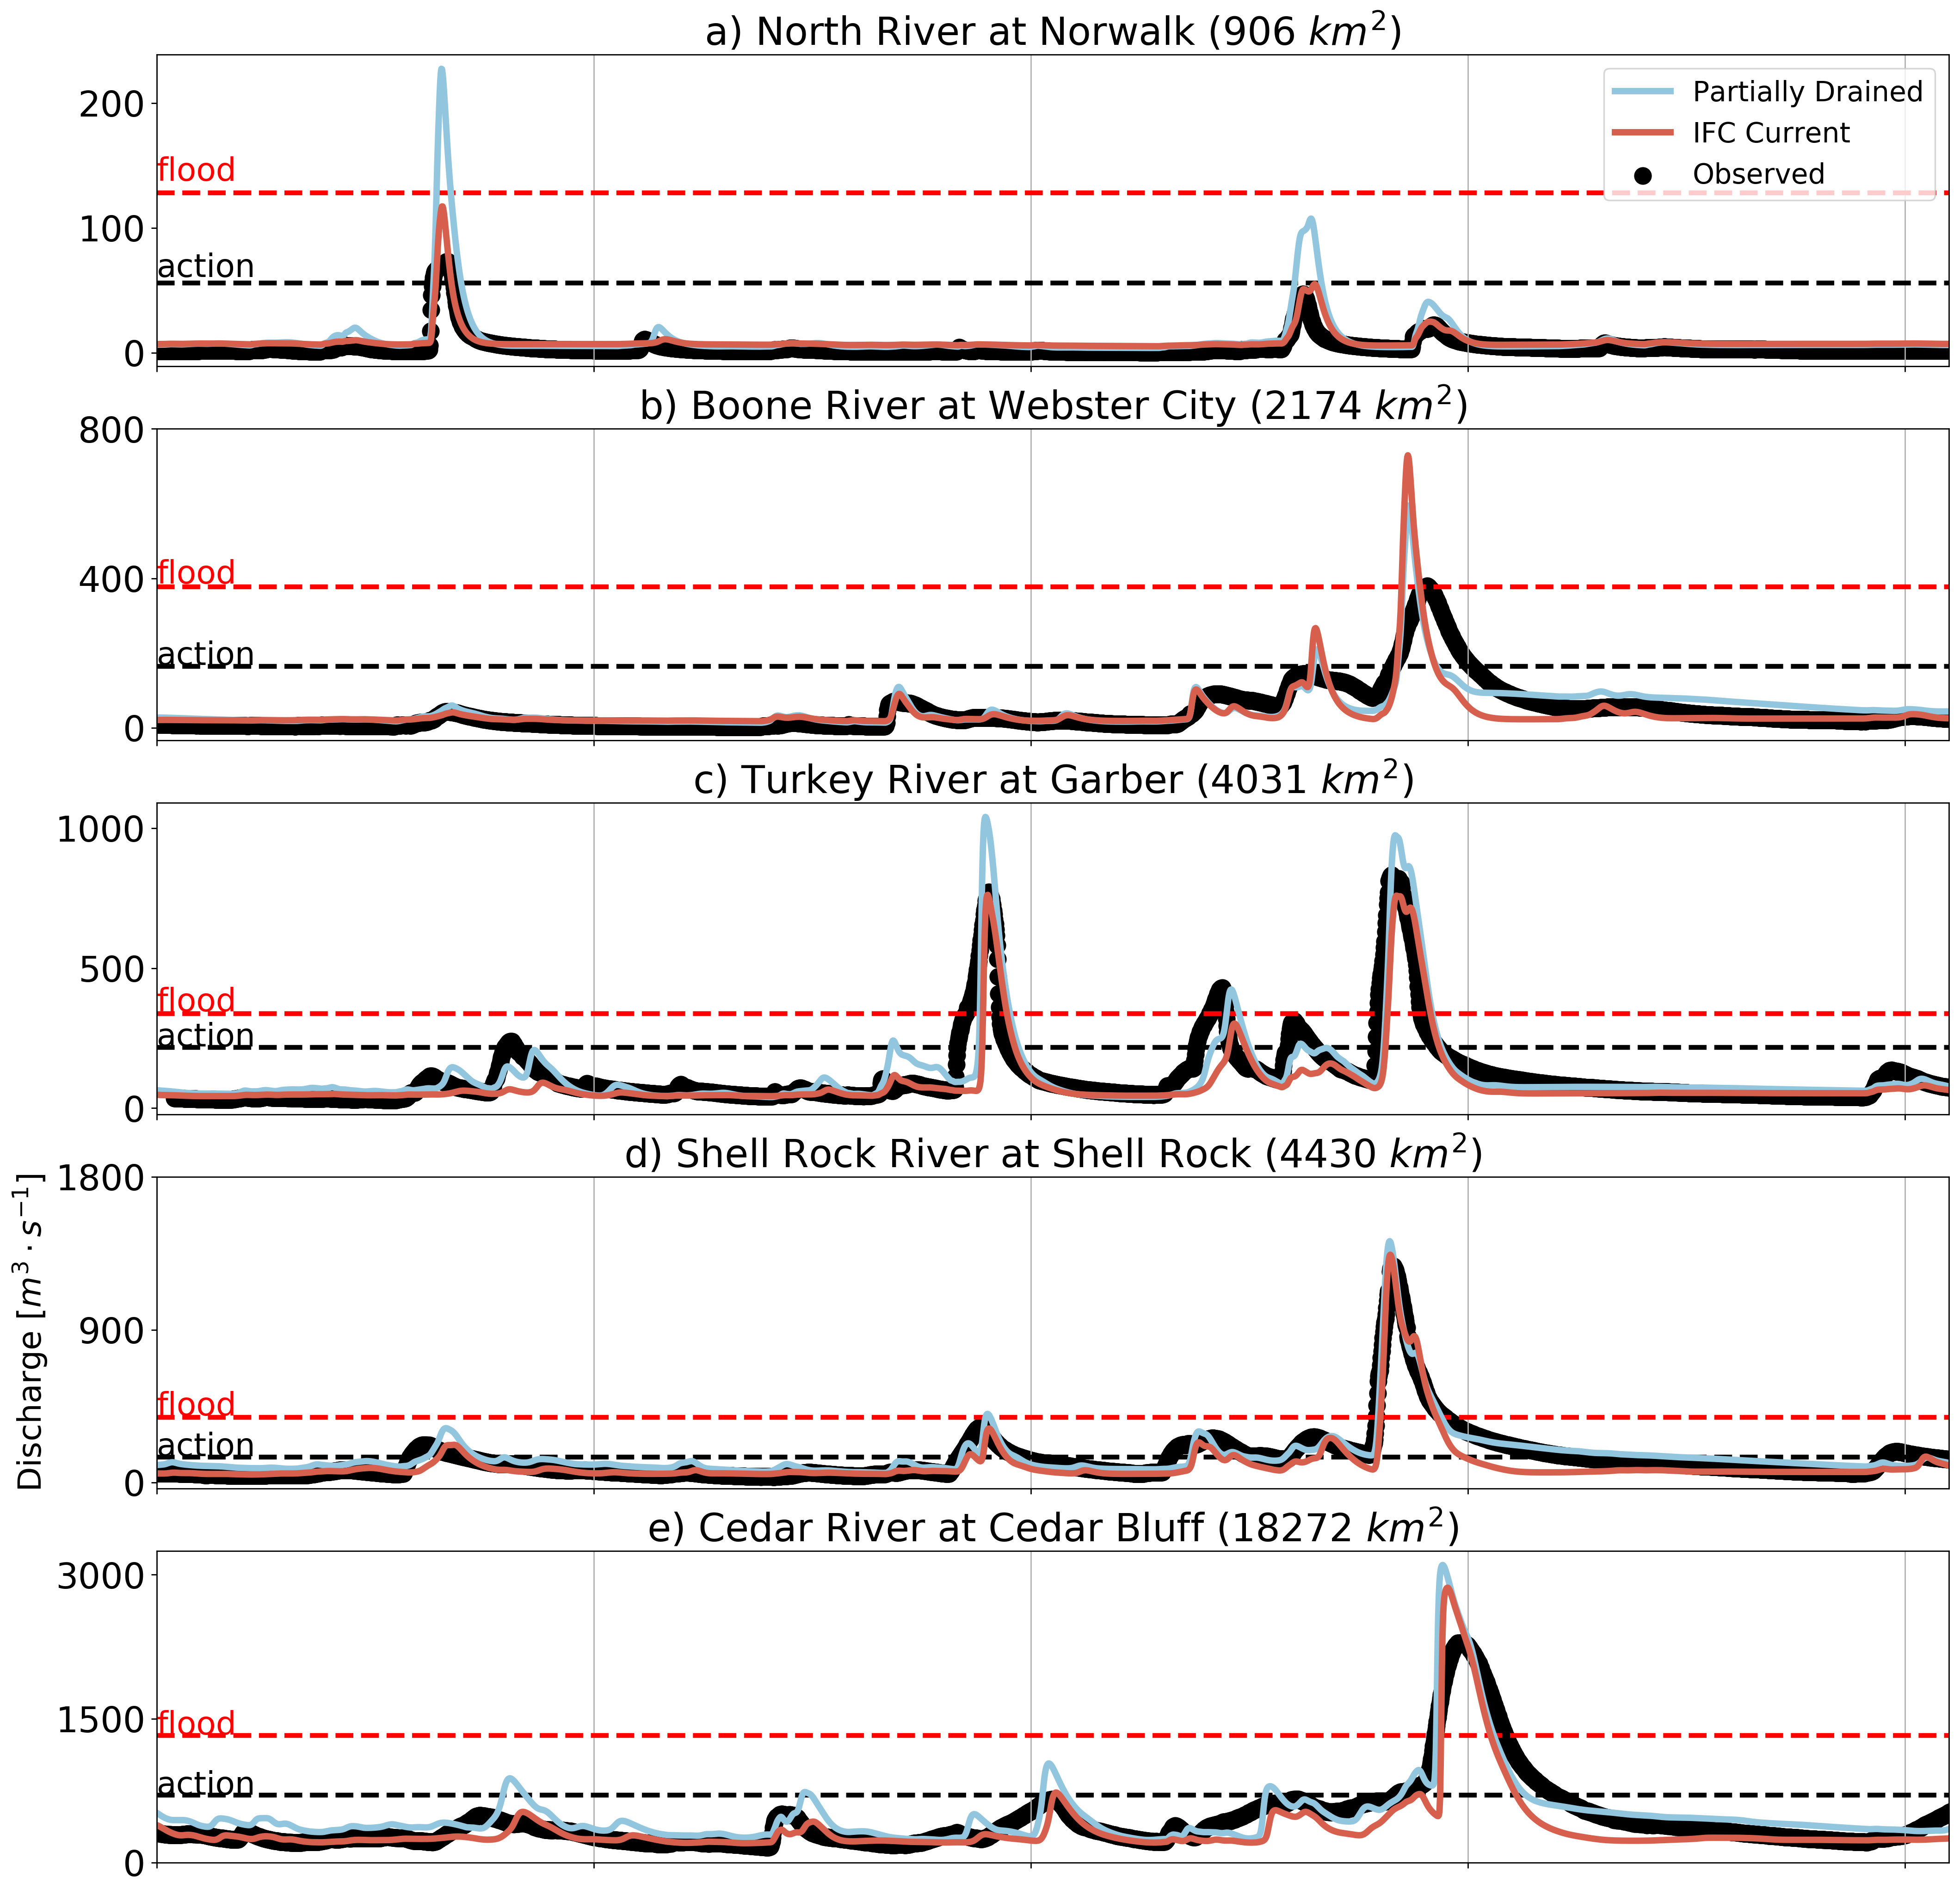

In [461]:
fig = pl.figure(figsize=(20,25), dpi=250)
legend = True
let = ['a)','b)','c)','d)','e)','f)']
yticks = [[0,100,200],         
        [0,400,800],
        [0,500,1000],         
        [0,900,1800],
        [0,1500,3000]]
ytexts = [240,1200,300,1200,2300,2500]
for c,code in enumerate([5486000,5481000,5412500,5462000,5464780]):#,'05464780']):
    ax = fig.add_subplot(6,1,c+1)
    n = names.loc[code]
    plot_event(ax, usgs.loc[code][0], let[c] +' '+n.river + ' at ' +n.town,legend=legend,
               f1 ='2016-07', f2 = '2016-11', timeFreq = '30d', )#ytext = 300, text = let[c])
    ax.set_ylabel('')
    #ax.text('2013-07-02 00:00', ytexts[c],let[c], size = 40)
    if c<5:
        ax.set_xticklabels([])
    if c == 3:
        ax.set_ylabel('Discharge [$m^3 \cdot s^{-1}$]', size = 20)
    ax.grid(axis = 'x')
    ax.set_yticks(yticks[c])
    legend = False
pl.savefig('figures/hydrographs.png', bbox_inches = 'tight')